In [1]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from load import load_pseudo, load_staph, load_nucleotides

%matplotlib inline

In [2]:
records_pseudo = load_pseudo()
records_staph = load_staph()

In [3]:
def show_count(ax, rects, format='{}'):
    '''Show the height of each bar in the bar chart'''
    for rect in rects:
        height = rect.get_height()
        ax.annotate(format.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    ha='center', va='bottom')

# The distribution of classes

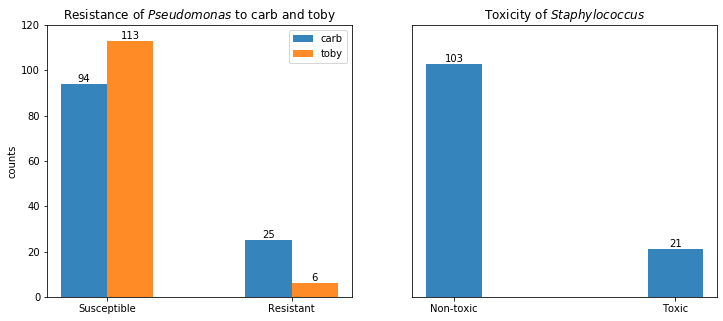

In [4]:
plt.figure(figsize=(12, 5))

# pseudo
plt.subplot('121')
x = np.array([0, 1]) # False, True
counts_carb = records_pseudo['carb'].value_counts()
carb = plt.bar(x=x-0.125, height=counts_carb, width=0.25, alpha=0.9, label='carb')
counts_toby = records_pseudo['toby'].value_counts()
toby = plt.bar(x=x+0.125, height=counts_toby, width=0.25, alpha=0.9, label='toby')
show_count(plt.gca(), carb)
show_count(plt.gca(), toby)
plt.xticks(x, ['Susceptible', 'Resistant'])
plt.ylim((0, 120))
plt.ylabel('counts')
plt.title('Resistance of $Pseudomonas$ to carb and toby')
plt.legend()

#staph
plt.subplot('122')
resp_counts = records_staph['resp'].value_counts()
rects = plt.bar(x=x, height=resp_counts, width=0.25, alpha=0.9)
show_count(plt.gca(), rects)
plt.xticks(x, ['Non-toxic', 'Toxic'])
plt.ylim((0, 120))
plt.yticks([])
plt.title('Toxicity of $Staphylococcus$')
plt.savefig('graph/classes.png')
plt.show()

# The missingness distribution

In [5]:
def missingness(ax, data):
    n, bins, patches = ax.hist(data, bins=30, alpha=0.9)
    mu, sigma = np.mean(data), np.std(data)
    ax.grid(True)
    x = sum(ax.get_xlim()) / 2
    y = sum(ax.get_ylim()) / 1.5
    ax.set_xlabel('missing percentage (%)')
    ax.text(mu, y, '$\mu={:.3}, \sigma={:.3}$'.format(mu, sigma))

In [6]:
def contrast_missingness(before, after, name):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 5))
    missingness(ax1, before)
    ax1.set_ylabel('counts')
    ax1.set_title('no imputation')
    missingness(ax2, after)
    ax2.set_title('naive imputation')

    fig.suptitle('Nucleotide missing percentage in ${}$'.format(name))
    plt.savefig(f'graph/missing_{name}')
    plt.show()

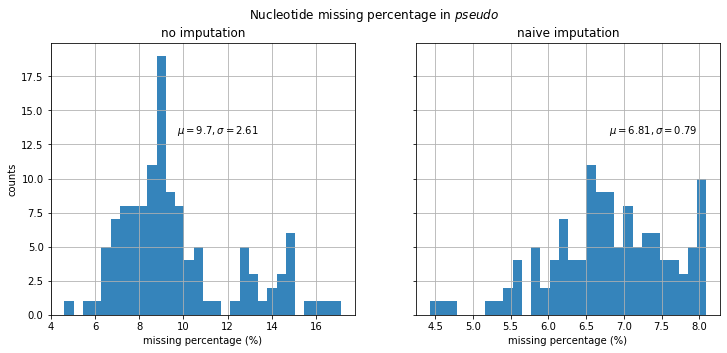

In [7]:
contrast_missingness(records_pseudo['missing_%'], records_pseudo['missing_%_i'], 'pseudo')

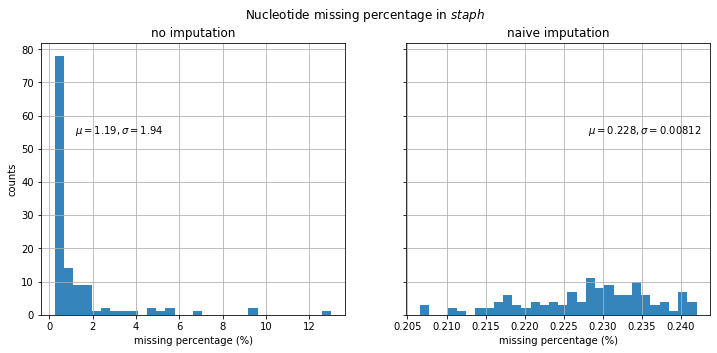

In [8]:
contrast_missingness(records_staph['missing_%'], records_staph['missing_%_i'], 'staph')

# Individual missingness

In [9]:
def individual_missingness(records, name):
    plt.figure(figsize=(19.2, 4.8))
    l = records.shape[0]
    o = plt.scatter(range(l), records['missing_%'])
    i = plt.scatter(range(l), records['missing_%_i'])

    plt.legend(handles=[o, i], labels=['original', 'imputed'])
    plt.xlim((-1, records.shape[0]))
    plt.ylim((0, np.ceil(np.max(records['missing_%']))))
    plt.xticks(ticks=range(l), labels=records['id'].to_list(), rotation=90, fontsize=9)
    plt.ylabel('missing percentage (%)')
    plt.title('Individual missing nucleotide percentage in ${}$'.format(name))
    plt.grid(axis='y')
    plt.savefig(f'graph/individual_missing_{name}', bbox_inches='tight')
    plt.show()

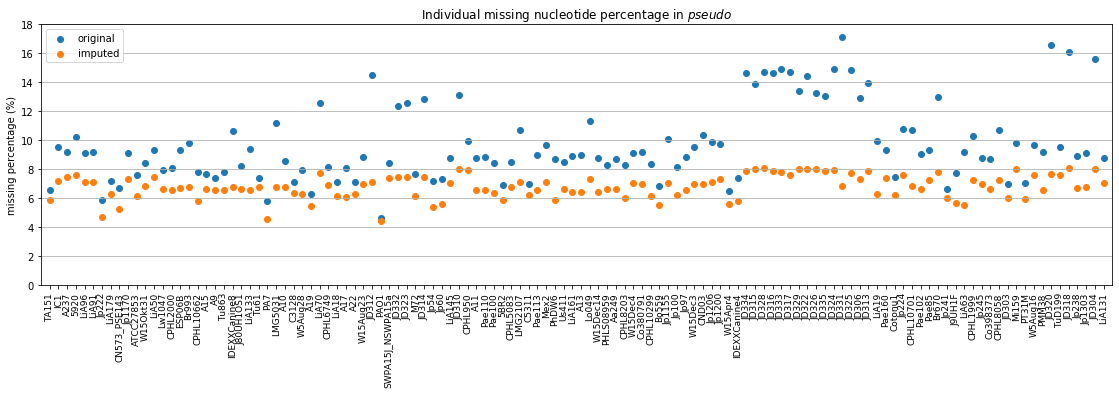

In [10]:
individual_missingness(records_pseudo, 'pseudo')

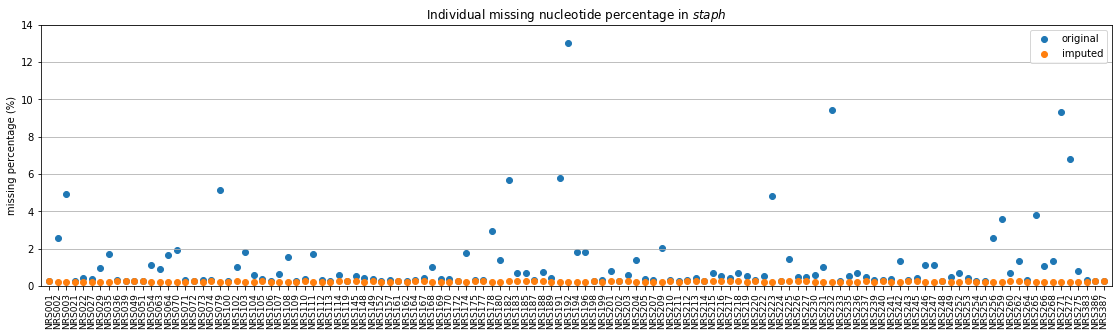

In [11]:
individual_missingness(records_staph, 'staph')

# Nucleotide ratios

In [12]:
def n_count(sequences):
    c = Counter()
    for seq in sequences:
        c.update(Counter(seq))
    return c

In [13]:
c_pseudo = n_count(records_pseudo['sequence'])
c_pseudo_i = n_count(records_pseudo['sequence_i'])
c_staph = n_count(records_staph['sequence'])
c_staph_i = n_count(records_staph['sequence_i'])

In [14]:
def n_pct(ax, data):
    total = pd.Series(data)
    total /= (total.sum() / 100)
    rects = ax.bar(x=total.index, height=total, alpha=0.9)
    ax.set_xlabel('nucleotides')
    show_count(ax, rects, '{:.4}%')

In [15]:
def contrast_n_pct(before, after, name):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 5))
    n_pct(ax0, before)
    ax0.set_title('no imputation')
    ax0.set_ylabel('percentage (%)')
    n_pct(ax1, after)
    ax1.set_title('naive imputation')
    fig.suptitle('Composition of ${}$'.format(name))
    plt.savefig(f'graph/nucleotide_pct_{name}')

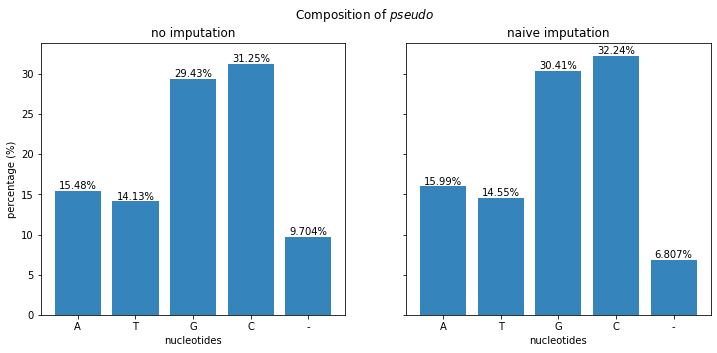

In [16]:
contrast_n_pct(c_pseudo, c_pseudo_i, 'pseudo')

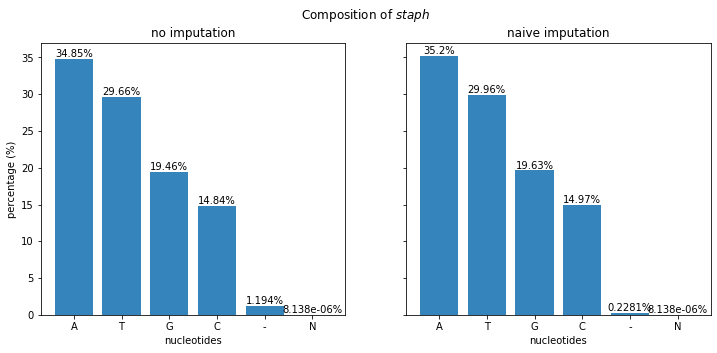

In [17]:
contrast_n_pct(c_staph, c_staph_i, 'staph')

# Gene variations

In [18]:
## 45 seconds * 2 + 1.5 minutes *2 = 4.5 minutes
# sequence_pseudo = load_nucleotides('../data/pseudo/concatenated.fasta')
# sequence_pseudo_i = load_nucleotides('../data/pseudo/concatenated_naive_impute.fasta')
# sequence_staph = load_nucleotides('../data/staph/core_gene_alignment-narsa.aln')
# sequence_staph_i = load_nucleotides('../data/staph/core_gene_alignment-narsa_naive_impute.fasta')
## 45 seconds * 2 + 1.5 minutes *2 = 4.5 minutes
# variations_pseudo = sequence_pseudo.nunique()
# variations_pseudo_i = sequence_pseudo_i.nunique()
# variations_staph = sequence_staph.nunique()
# variations_staph_i = sequence_staph_i.nunique()
#
# np.save('../data/graph/pseudo_variation_o.npy', variations_pseudo)
# np.save('../data/graph/pseudo_variation_i.npy', variations_pseudo_i)
# np.save('../data/graph/staph_variation_o.npy', variations_staph)
# np.save('../data/graph/staph_variation_i.npy', variations_staph_i)

In [19]:
variations_pseudo = np.load('../data/graph/pseudo_variation_o.npy')
variations_pseudo_i = np.load('../data/graph/pseudo_variation_i.npy')
variations_staph = np.load('../data/graph/staph_variation_o.npy')
variations_staph_i = np.load('../data/graph/staph_variation_i.npy')

In [20]:
def variation(ax, variation):
    counts = np.bincount(variation)
    rects = ax.bar(range(len(counts)), counts)
    ax.set_xlabel('number of different nucleotides at a locus')
    show_count(ax, rects)

In [21]:
def contrast_variation(before, after, name):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 5))
    variation(ax0, before)
    ax0.set_title('no imputation')
    ax0.set_ylabel('number of loci')
    variation(ax1, after)
    ax1.set_title('navie imputation')
    fig.suptitle('Gene variations in ${}$'.format(name))
    plt.savefig(f'graph/variation_{name}')

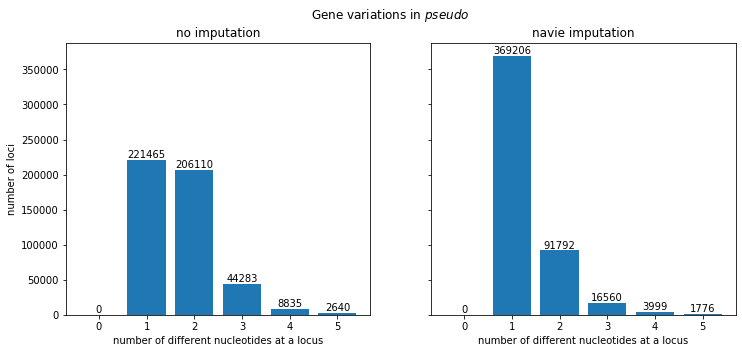

In [22]:
contrast_variation(variations_pseudo, variations_pseudo_i, 'pseudo')

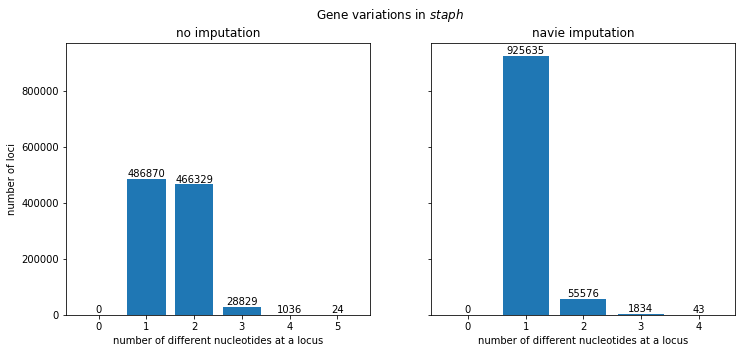

In [23]:
contrast_variation(variations_staph, variations_staph_i, 'staph')

# Missingness locations

In [24]:
# %time sequence_pseudo_o = load_nucleotides('../data/pseudo/concatenated.fasta')
# %time sequence_pseudo_i = load_nucleotides('../data/pseudo/concatenated_naive_impute.fasta')
# %time sequence_staph_o = load_nucleotides('../data/staph/core_gene_alignment-narsa.aln')
# %time sequence_staph_i = load_nucleotides('../data/staph/core_gene_alignment-narsa_naive_impute.fasta')
# # 2*1.5 minutes + 2*3 minutes
# %time missing_pseudo_o = sequence_pseudo != '-'
# %time missing_pseudo_i = sequence_pseudo_i != '-'
# %time missing_staph_o = sequence_staph != '-'
# %time missing_staph_i = sequence_staph_i != '-'

# np.save('../data/graph/missing_pseudo_o.npy', missing_pseudo_o)
# np.save('../data/graph/missing_pseudo_i.npy', missing_pseudo_i)
# np.save('../data/graph/missing_staph_o.npy', missing_staph_o)
# np.save('../data/graph/missing_staph_i.npy', missing_staph_i)

In [25]:
missing_pseudo_o = np.load('../data/graph/missing_pseudo_o.npy')
missing_pseudo_i = np.load('../data/graph/missing_pseudo_i.npy')
missing_staph_o = np.load('../data/graph/missing_staph_o.npy')
missing_staph_i = np.load('../data/graph/missing_staph_i.npy')

In [26]:
def sequence_missingness(before, after, name):
    # black is missingness
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 10))
    ax1.imshow(before, aspect='auto', cmap='gray')
    ax2.imshow(after, aspect='auto', cmap='gray')
    ax1.set_title('no imputation')
    ax2.set_title('naive imputation')
    ax1.set_ylabel('samples')
    ax2.set_ylabel('samples')
    ax2.set_xlabel('loci')
    fig.suptitle('Sequence missingness in ${}$'.format(name))
    plt.savefig(f'graph/missing_map_{name}')
    plt.show()

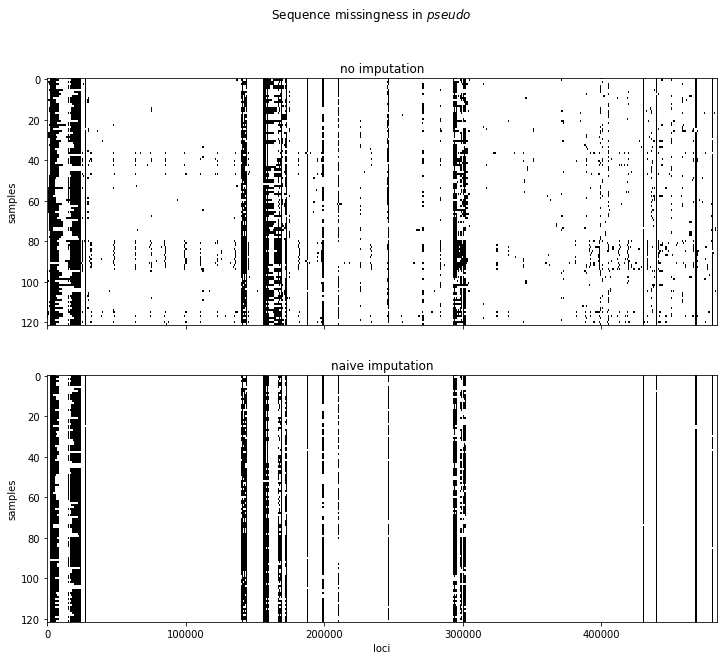

In [27]:
sequence_missingness(missing_pseudo_o, missing_pseudo_i, 'pseudo')

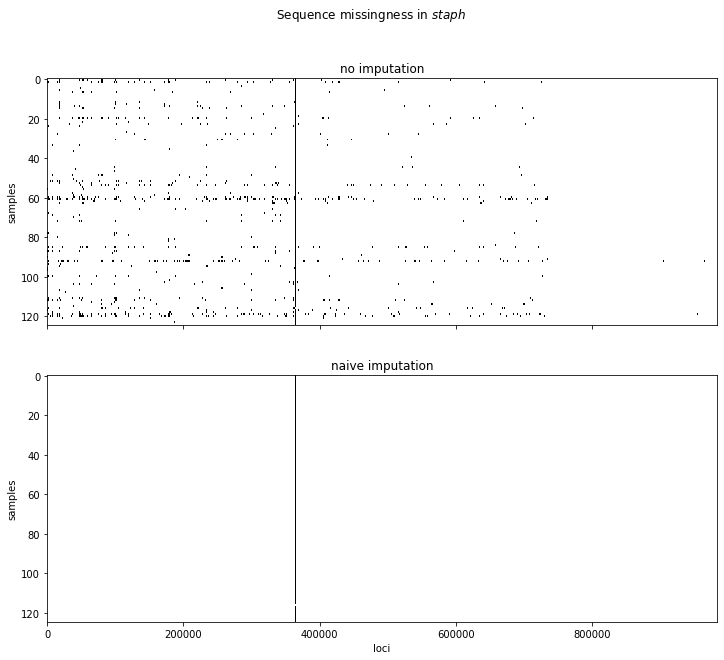

In [28]:
sequence_missingness(missing_staph_o, missing_staph_i, 'staph')

# Processed data visualization

In [29]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os

In [30]:
def scatter(ax, x, y_true, y_false, title):
    ax.scatter(x[y_true, 0], x[y_true, 1], label='True')
    ax.scatter(x[y_false, 0], x[y_false, 1], label='False')
    ax.set_title(title)

In [31]:
def scatter_pca_tsne(d, x):
    x_pca = PCA(n_components=2).fit_transform(x)
    x_tsne = TSNE(n_components=2).fit_transform(x)
    y_true = y.values
    y_false = ~y_true

    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    scatter(ax0, x_pca, 'PCA')
    scatter(ax1, x_tsne, 'TSNE')
    fig.suptitle(d[:d.index('.')])

In [33]:
mask_pseudo = (records_pseudo['carb'].notna() & records_pseudo['carb'].notna())
y_pseudo = records_pseudo['carb'][mask_pseudo].astype('?')

s_pseudo = {f'{impute}_{nc}_{selection}_{extraction}.npy'
     for impute in 'oi'
     for nc in 'nc'
     for selection in '-vx'
     for extraction in '-pts'}
data_pseudo = {d: np.load(os.path.join('../data/pseudo/preprocess', d)) for d in s_pseudo}

In [34]:
mask_staph = records_staph['resp'].notna()
y_staph = records_staph['resp'][mask_staph].astype('?')

s_staph = {f'{impute}_{nc}_{selection}_{extraction}.npy'
     for impute in 'oi'
     for nc in 'nc'
     for selection in '-vx'
     for extraction in '-pts'}
data_staph = {d: np.load(os.path.join('../data/staph/preprocess', d)) for d in s_staph}

In [35]:
def show_processed(data, y, pca_or_tsne, name):
    fig, axs = plt.subplots(nrows=8, ncols=6, figsize=(20, 28))
    y_true = y.values
    y_false = ~y_true
    for ax, key in zip(axs.flatten(), sorted(data.keys())):
        x = pca_or_tsne(n_components=2).fit_transform(data[key])

        scatter(ax, x, y_true, y_false, key[:key.index('.')])
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax.legend()
    fig.suptitle(f'Visualization of processed ${name}$ data with {pca_or_tsne.__name__}',
                 x=0.5, y=0.9, va='center', ha='center', fontsize=20)
    plt.savefig(f'graph/processed_visualization_{pca_or_tsne.__name__}_{name}.png', bbox_inches='tight')

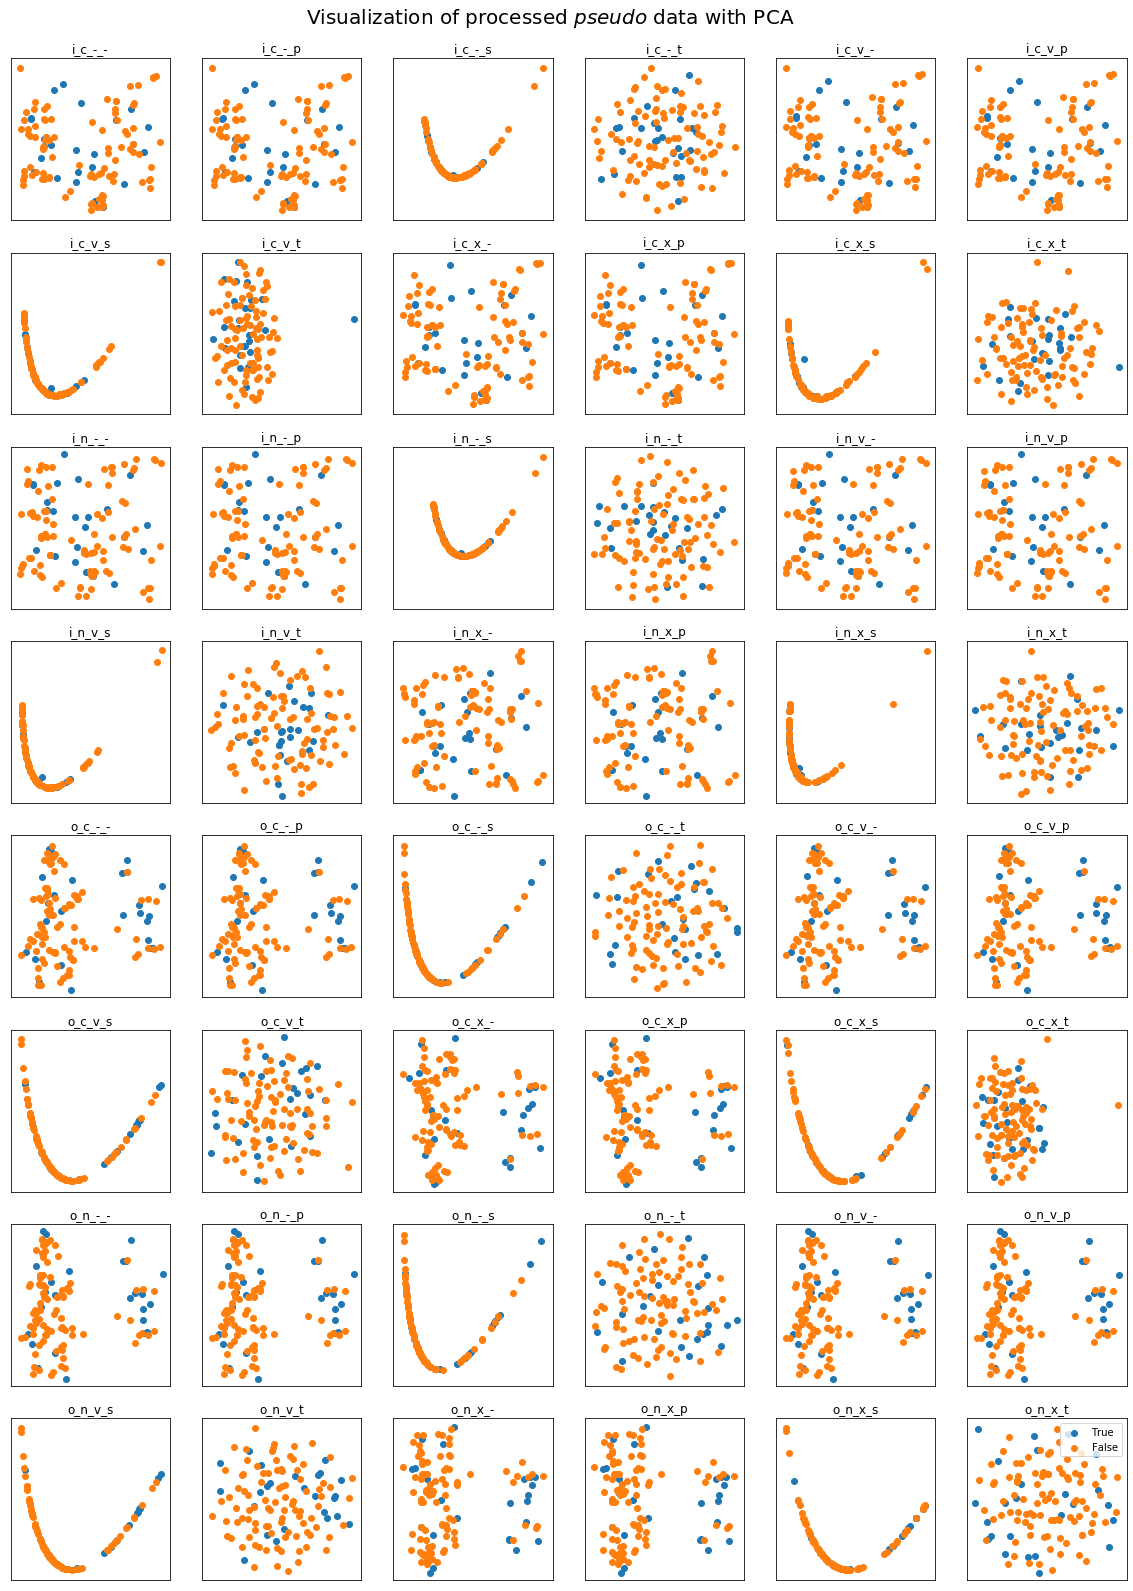

In [36]:
show_processed(data_pseudo, y_pseudo, PCA, 'pseudo')

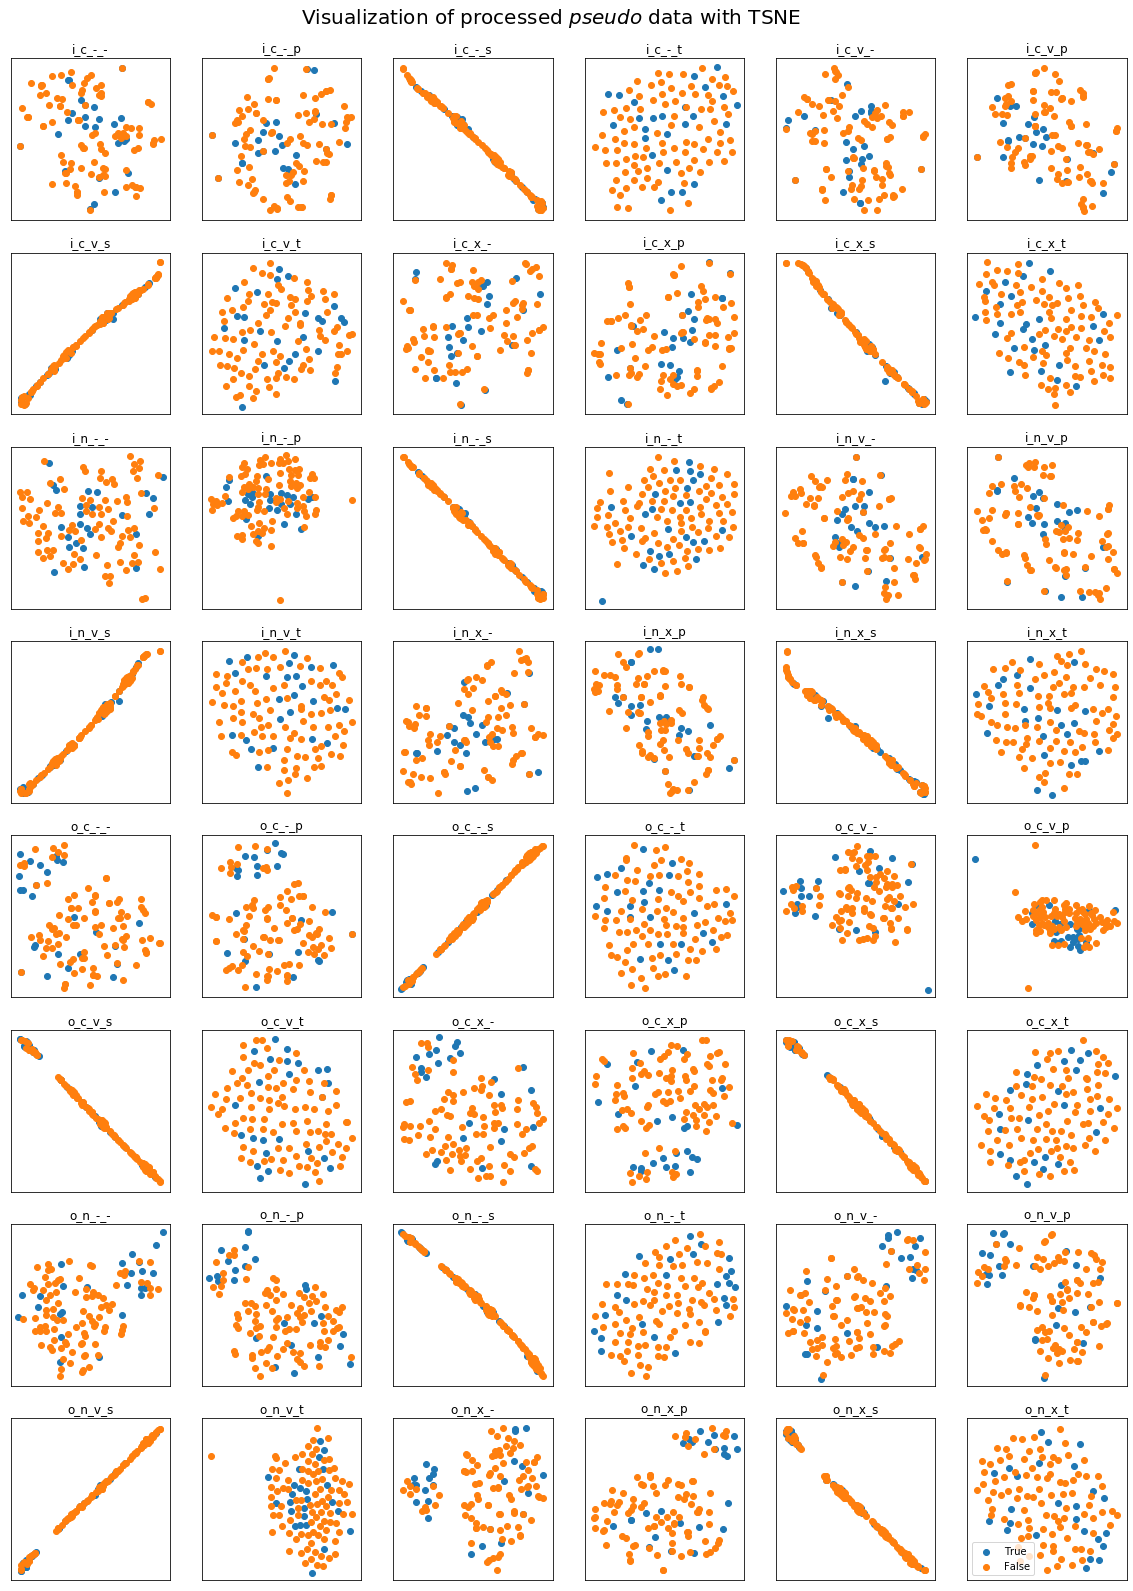

In [37]:
show_processed(data_pseudo, y_pseudo, TSNE, 'pseudo')

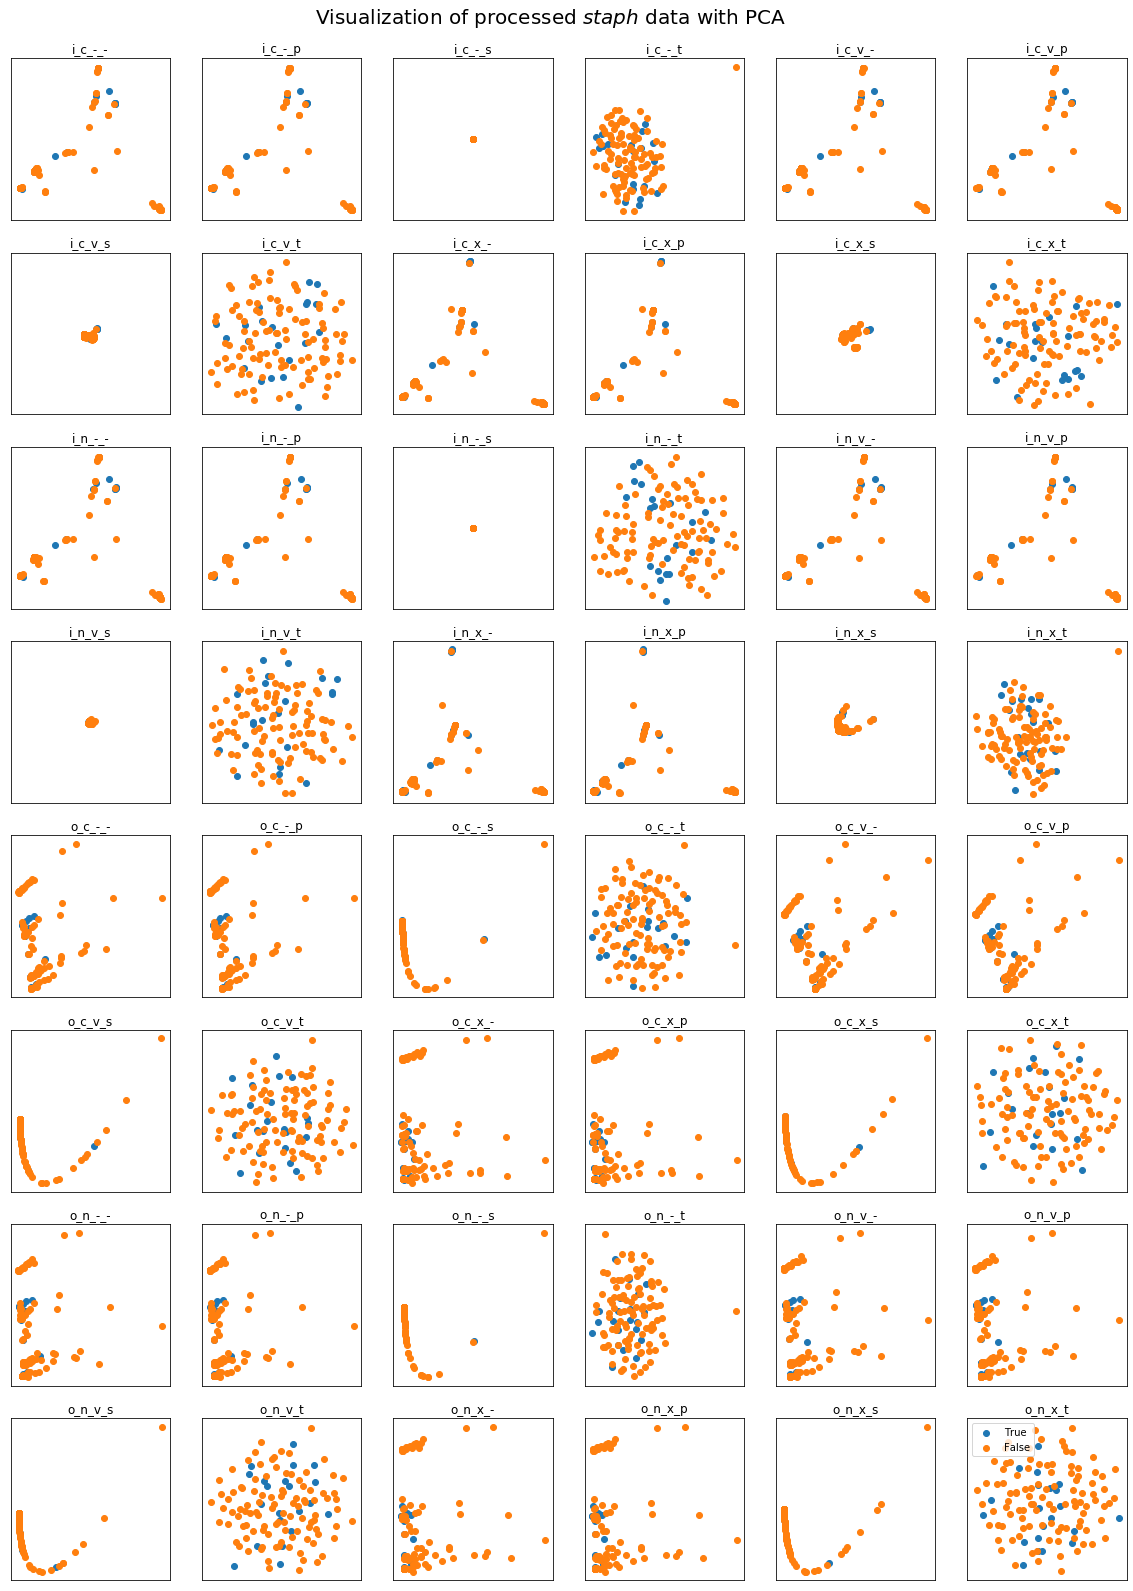

In [38]:
show_processed(data_staph, y_staph, PCA, 'staph')

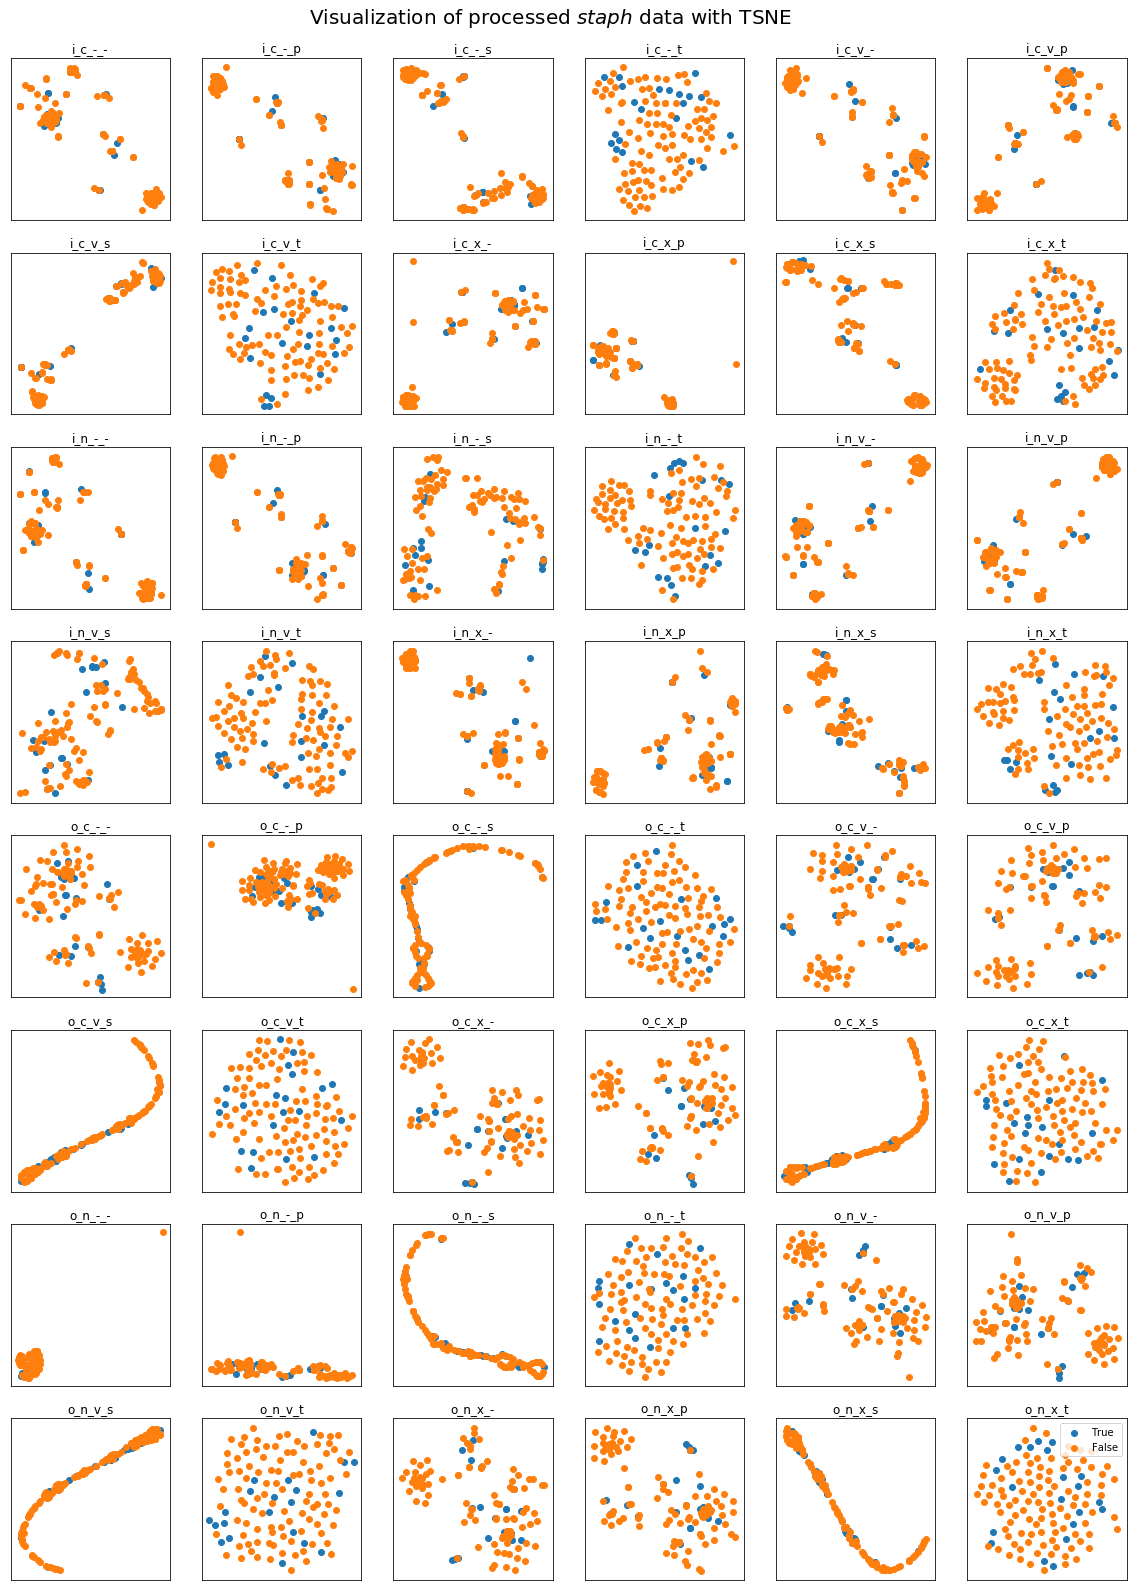

In [39]:
show_processed(data_staph, y_staph, TSNE, 'staph')